Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

**Задания**
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

**Описание данных**

Имеются следующие поля:

* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

### 1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

**В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
df = pd.read_csv('data/games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
df.shape

(16598, 11)

In [18]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
df.dropna(inplace=True)

Ответ: Year 271

### 2. Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

* Name (название) - **Ранговая/порядковая**			
* Platform (платформа) - **Номинативная**			
* Genre (жанр) - **Номинативная**				
* Publisher (издатель) - **Номинативная**				
* Year (год) - **Дискретная**				
* NA_Sales (объем продаж)	- **Непрерывная**			
* EU_Sales (объем продаж) - **Непрерывная**			
* JP_Sales (объем продаж) - **Непрерывная**				
* Other_Sales (объем продаж) - **Непрерывная**				
* Global_Sales (объем продаж) - **Непрерывная**	


### 3. Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

**Выберите верные утверждения:**

* **Мода равна 2009**
* Мода равна 2007
* Медианный год меньше, чем средний
* **Примерно половина игр была выпущена после 2007 года**
* **Медианный год больше, чем средний**

In [20]:
df.Year.mode()

0    2009.0
Name: Year, dtype: float64

In [21]:
df.Year.median()

2007.0

<Axes: xlabel='Year', ylabel='Count'>

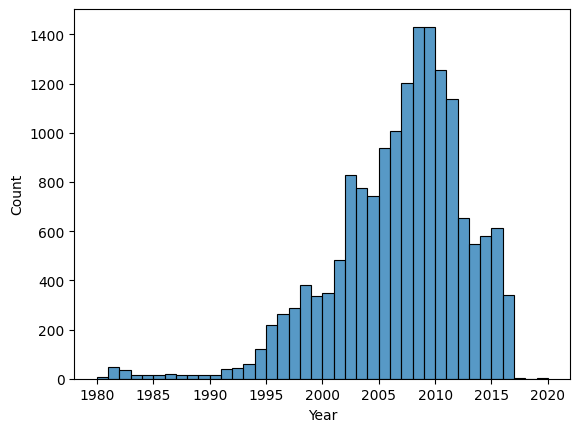

In [22]:
sns.histplot(df.Year, bins=40)

### 4. На каких платформах произошло больше всего релизов?

**Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.**

Пример: 

'Wii', 'NES', 'GB'

In [23]:
frequency = df.Platform.value_counts(normalize=True) * 100
frequency

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: proportion, dtype: float64

In [24]:
above_7_frequency = frequency.reset_index().query('proportion > 7')
above_7_frequency

,Platform,proportion
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508


Ответ: 'DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'

### 5. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

**В качестве ответа укажите наибольшую абсолютную частоту встречаемости.**

In [25]:
df.Publisher.value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

Ответ: Electronic Arts 1339

### 6. Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

**В каком регионе медианное значение объема продаж является наибольшим?**

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [26]:
nintendo = df.query("Publisher == 'Nintendo'")
nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
nintendo.describe().iloc[:,2:6]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


* **NA (North America)**
* EU (Europe)
* JP (Japan)
* Other

### 7. Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

* по оси x будет расположен жанр игры (Genre)
* по оси у – объем продаж в Японии (JP_sales)

**Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?**

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

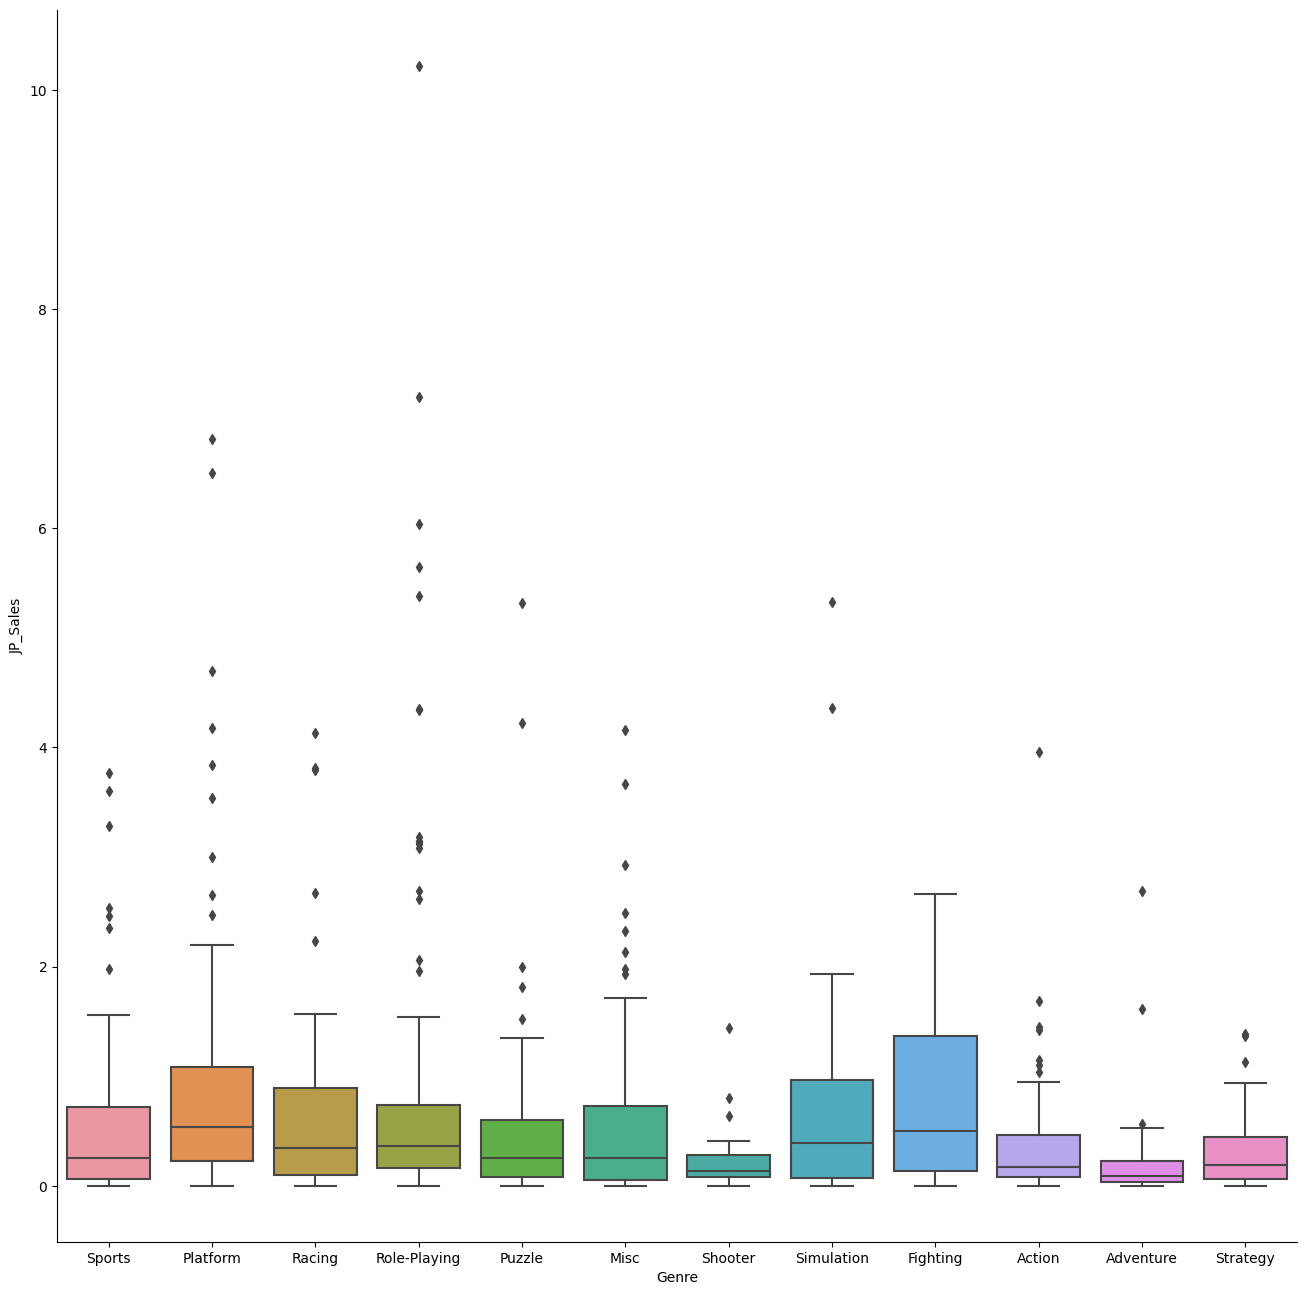

In [28]:
plt.figure(figsize=(16,16))
sns.boxplot(x=nintendo.Genre, y=nintendo.JP_Sales)
sns.despine()

* **Межквартильный размах у Strategy меньше, чем у Puzzle**
* **Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation**
* **Наибольший межквартильный размах наблюдается у игр жанра Fighting**
* Наибольший межквартильный размах наблюдается у игр жанра Role-Playing
* Среднее значение продаж игр жанра Fighting выше, чем у игр Simulation

### 8. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

**На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.**

In [29]:
global_genres = nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
        .groupby(['Year', 'Genre'], as_index=False).Global_Sales.sum()
global_genres.head()

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17


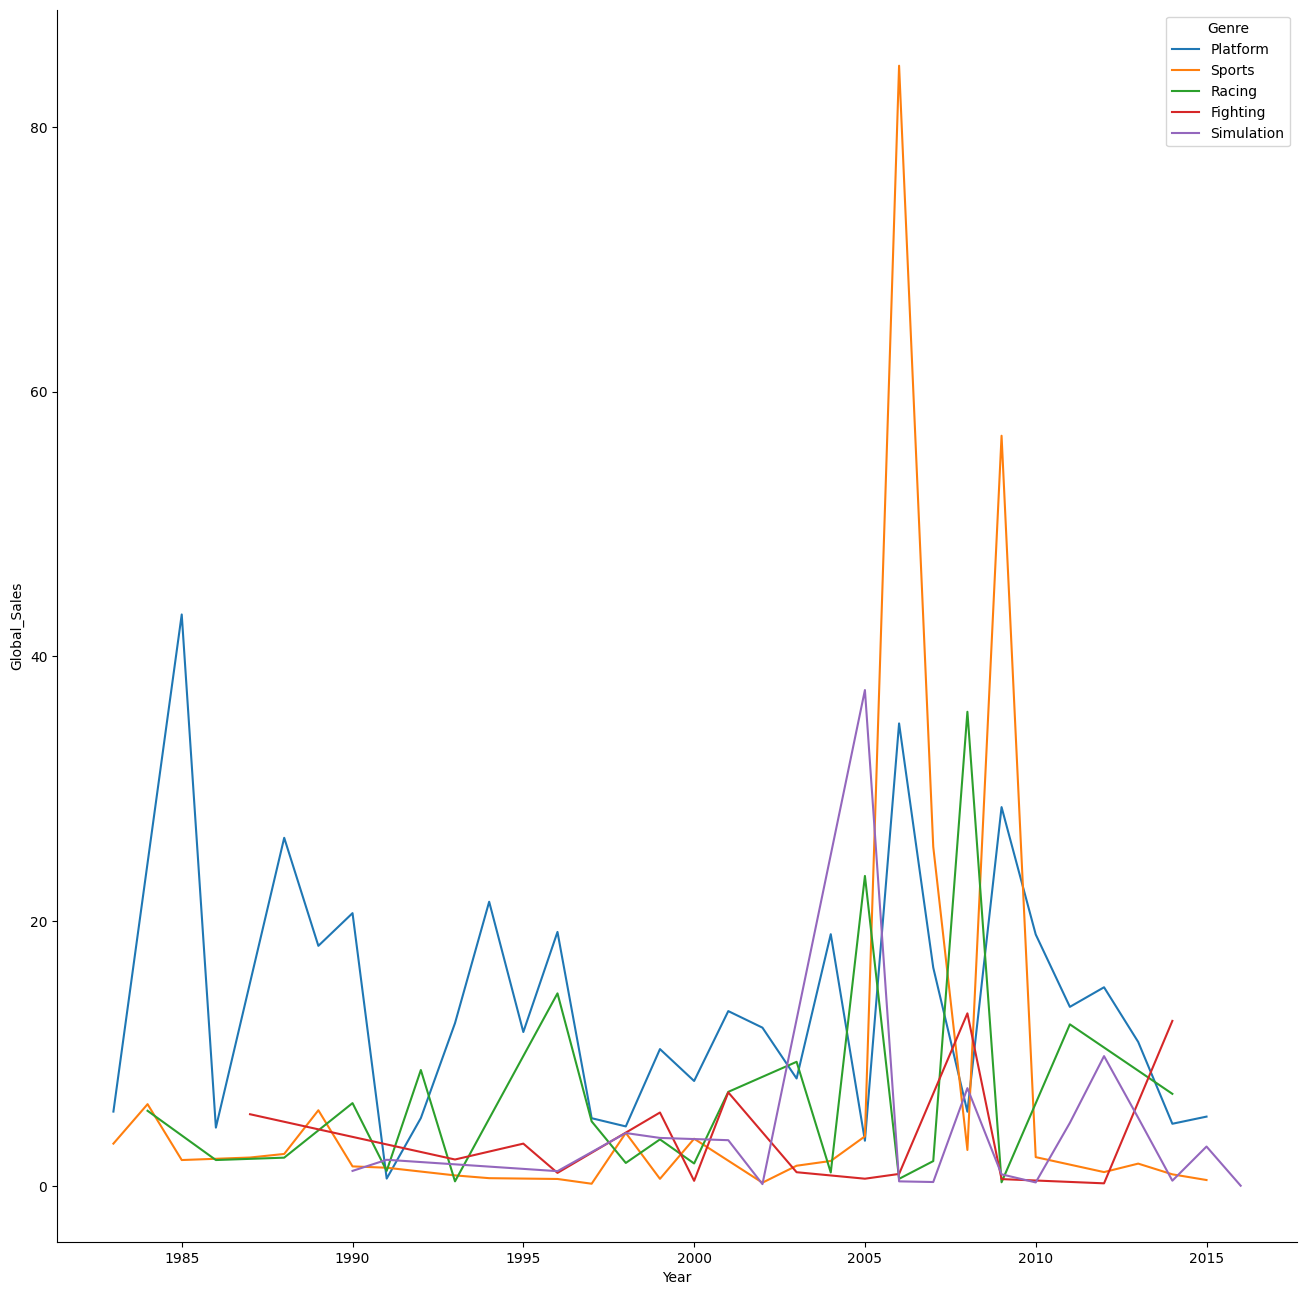

In [30]:
plt.figure(figsize=(16,16))
sns.lineplot(x = global_genres.Year, y = global_genres.Global_Sales, hue = global_genres.Genre, data = global_genres)
sns.despine()

* 2005 – 2006
* 1998 – 2014
* 2009 – 2015
* **2005 – 2010**